In [ ]:
#@author : Dipu
#date : 19Nov2020
#Project : GPA

In [1]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2020,11,18)
stk_data = gh(symbol='SBIN',start=start,end=end)

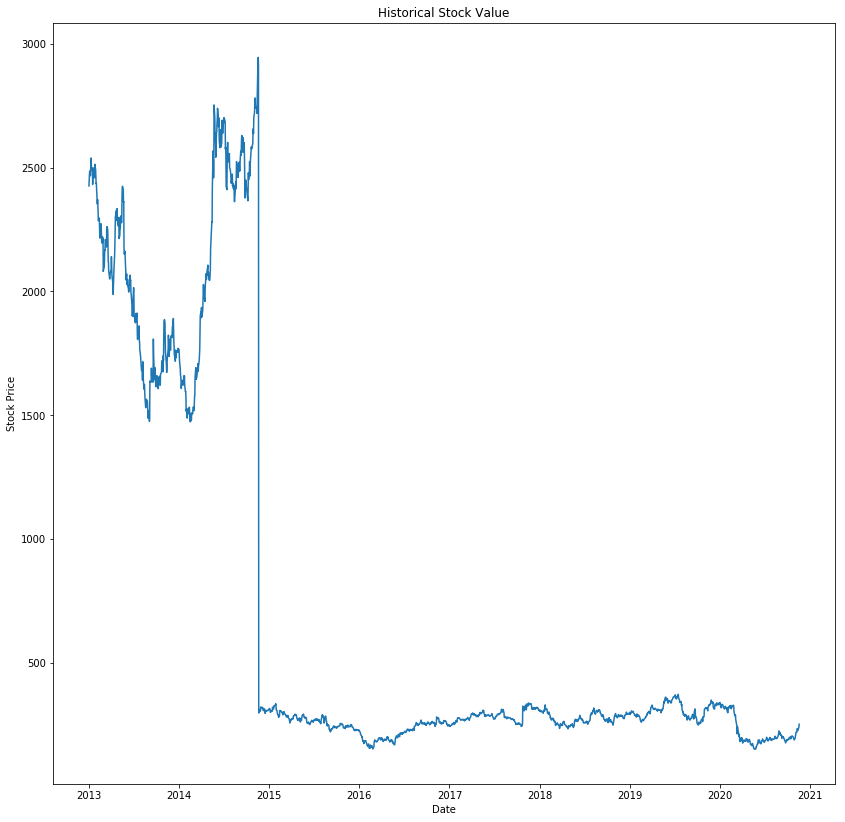

In [3]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [4]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']
train_stock_price = data2.iloc[:, 1:2].values

In [5]:
data2.iloc[:, 1:2].head(5)

,Open
Date,
2013-01-01,2404.9
2013-01-02,2450.0
2013-01-03,2460.0
2013-01-04,2460.0
2013-01-07,2490.0


In [6]:
train_stock_price.shape

(1951, 1)

In [7]:
train = train_stock_price[0:1800,:]
valid = train_stock_price[1800:,:]

In [8]:
import warnings as wr
wr.simplefilter(action='ignore')

In [9]:
from pyramid.arima import auto_arima

C:\Users\dipayan\AppData\Roaming\Python\Python36\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [10]:
m_arima=auto_arima(train, start_p=1, start_q = 1, max_p=4, max_q=4,m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warning=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=20157.520, BIC=20184.962, Fit time=13.522 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=21340.752, BIC=21351.729, Fit time=0.335 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=20831.812, BIC=20853.765, Fit time=3.438 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=20158.264, BIC=20180.217, Fit time=4.350 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=20159.881, BIC=20192.811, Fit time=8.042 seconds


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=21261.537, BIC=21283.490, Fit time=4.921 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=20159.865, BIC=20192.795, Fit time=21.002 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=20161.984, BIC=20200.402, Fit time=18.711 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=20154.287, BIC=20187.217, Fit time=12.992 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=20152.866, BIC=20180.307, Fit time=5.314 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=20154.636, BIC=20193.054, Fit time=7.933 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=20154.865, BIC=20187.795, Fit time=13.317 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=21340.239, BIC=21362.192, Fit time=0.659 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=20154.865, BIC=20187.795, Fit time=24.935 seconds
Fit A

In [12]:
m_arima.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend='c')

In [14]:
forecast = m_arima.predict(n_periods = 151)

In [16]:
train = data2.iloc[:, 1:2][:1800]
valid =  data2.iloc[:, 1:2][1800:]
valid['predictions'] = forecast

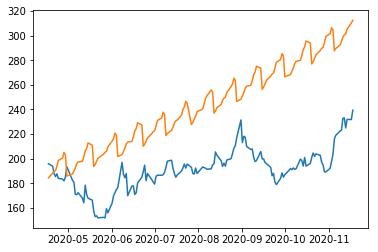

In [18]:
#plt.plot(train['Open'])
plt.plot(valid[['Open', 'predictions']])

In [23]:
from sklearn.externals import joblib
joblib.dump(m_arima, 'sbi_arima.pkl')

['sbi_arima.pkl']